# Neural Networks

In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from DesignMat import Polynomial
from Regressor import LeastSquares

np.random.seed(123)

## Learning XOR

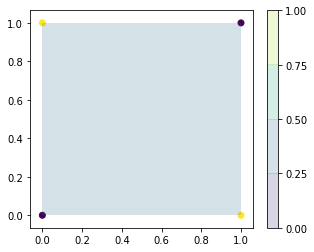

In [2]:
x_train = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
t_train = np.array([0, 1, 1, 0])

x0, x1 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
x_test = np.array([x0, x1]).reshape(2, -1).T

phi_train = Polynomial(1).dm(x_train)
phi_test  = Polynomial(1).dm(x_test)

t = LeastSquares().fit(phi_train, t_train).predict(phi_test)

plt.figure(figsize=(5, 4))
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)

levels = np.linspace(0, 1, 5)
plt.contourf(x0, x1, np.asarray(t).reshape(100, 100), levels, alpha=0.2)
plt.colorbar()
plt.show()

We have

- input

\begin{align}
\mathbf{x} = \left( \begin{array}{l}
0 \\
0 \\
1 \\
\end{array} \right) \text{ or }
\left( \begin{array}{l}
0 \\
1 \\
1 \\
\end{array} \right) \text{ or }
\left( \begin{array}{l}
1 \\
0 \\
1 \\
\end{array} \right) \text{ or }
\left( \begin{array}{l}
1 \\
1 \\
1 \\
\end{array} \right)
\end{align}

- hidden layer

\begin{align}
a^1_{j} = {\mathbf{w}^1_j}^T \mathbf{x} \text{, } \mathbf{a}^1 = (a^1_{j} :\forall j)^T \text{ and } z_{j} = h(a^1_{j}) \text{, } \mathbf{z} = (z_{j}: \forall j)^T
\end{align}

- output

\begin{align}
a^2_{k} = {\mathbf{w}^2_{k}}^T \mathbf{z} \text{ and } y = y_k = h(a^2_{k})
\end{align}

Note that, in our case, $k = \{1\}$.

<b> Feed-Forward </b>

To apply stochastic gradient decent, we consider one instance and its error function

\begin{align}
E_i = \frac{1}{2} \left( y - t \right)^2
\end{align}

\begin{align}
\mathbf{z} = h\left({\mathbf{W}^1}^T \mathbf{x} \right) \text{ and } y = h\left({\mathbf{w}^2}^T \mathbf{z}\right)
\end{align}

where

\begin{align}
\mathbf{W}^{1} = (\mathbf{w}^1_{j} : \forall j)
\end{align}

<b> Derivatives </b>

\begin{align}
\sigma^\prime(x) &= \sigma(x) (1- \sigma(x)) \\
\tanh^\prime(x) &= 1 -\tanh^2(x)
\end{align}

Assume $h = \tanh$

<b> Error Backpropagation </b>

\begin{align}
\delta^2_{k} &\equiv \frac{\partial E_i}{\partial a^2_k} = \frac{\partial E_i}{\partial y} \frac{\partial y}{\partial a^2_k} = (y-t) h^\prime(a^2_k) = (y-t) (1- h^2(a^2_k)) = (y-t) (1- y^2) \\
\delta^1_{j} &\equiv \frac{\partial E_i}{\partial a^1_{j}} = \sum_k \frac{\partial E_i}{\partial a^2_{k}} \frac{\partial a^2_{k}}{\partial z_j} \frac{\partial z_j}{\partial a^1_{j}} = h^\prime(a^1_{j}) \sum_{k} \delta^2_{k} w^2_{k,j} = (1-z_j^2) \sum_{k} \delta^2_{k} w^2_{k,j}
\end{align}

\begin{align}
\frac{\partial E_i}{\partial \mathbf{w}^2_k} & = \frac{\partial E_i}{\partial a^2_k} \frac{\partial a^2_k}{\partial \mathbf{w}^2_k} = \delta^2_{k} \mathbf{z} \\
\frac{\partial E_i}{\partial \mathbf{w}^1_j} & = \frac{\partial E_i}{\partial a^1_j} \frac{\partial a^1_j}{\partial \mathbf{w}^1_j} = \delta^1_{j} \mathbf{x}
\end{align}

epochs:0, error=[-0.5336806]
epochs:10000, error=[0.00023887]
epochs:20000, error=[0.00011636]
epochs:30000, error=[-0.00645277]
epochs:40000, error=[-0.00559666]
epochs:50000, error=[1.13629266e-05]
epochs:60000, error=[1.25894388e-06]
epochs:70000, error=[-0.00414332]
epochs:80000, error=[-0.00385302]
epochs:90000, error=[-0.00361445]
[[0.         0.         0.00004721]
 [0.         1.         0.99666866]
 [1.         0.         0.99658079]
 [1.         1.         0.00004328]]


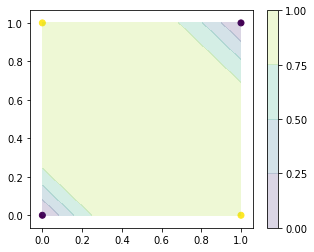

In [3]:
import numpy as np

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return x*(1.0-x)

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2

class NeuralNetwork:
    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime
        
        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, t, learning_rate=0.2, epochs=100000):
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        # Add the bias unit to the input layer X, so that
        # X = [[1. 0. 0.]
        #      [1. 0. 1.]
        #      [1. 1. 0.]
        #      [1. 1. 1.]]
         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            z = [X[i]]
            
            for l in range(len(self.weights)):
                z.append(self.activation(np.array(self.weights[l]).T @ np.array(z[l])))

            # backpropagation
            # output layer y = z[-1]
            error = z[-1] - t[i]
            deltas = [error * self.activation_prime(z[-1])]
            for l in range(len(self.weights) - 1, 0, -1): 
                deltas.append(np.dot(self.weights[l], deltas[-1]) * self.activation_prime(z[l]))
            deltas.reverse()

            for i in range(len(self.weights)):
                self.weights[i] -= learning_rate * np.array(z[i])[:,None].dot(np.array(deltas[i])[:,None].T)

            if k % 10000 == 0: print('epochs:{}, error={}'.format(k, error))

    def predict(self, X): 
        ones = np.atleast_2d(np.ones(X.shape[0]))
        y = np.concatenate((ones.T, X), axis=1)
        for l in range(0, len(self.weights)):
            y = self.activation(np.dot(y, self.weights[l]))
        return y

nn = NeuralNetwork([2,2,1], activation='tanh')
x_train = np.array([[0, 0], 
                    [0, 1],
                    [1, 0],
                    [1, 1]])
t_train = np.array([0, 1, 1, 0])
nn.fit(x_train, t_train)
np.set_printoptions(suppress=True)
print(np.append(x_train, nn.predict(x_train), axis=1))

plt.figure(figsize=(5, 4))
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)

x0, x1 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
x_test = np.array([x0, x1]).reshape(2, -1).T
levels = np.linspace(0, 1, 5)
plt.contourf(x0, x1, np.asarray(nn.predict(x_test)).reshape(100, 100), levels, alpha=0.2)
plt.colorbar()
plt.show()